**IAyRN - PIA - RED NEURONAL CONVOLUCIONAL**

Christian Axel García Gaytán....................... 2045253

Linda Valeria Vázquez Morín........................2048681

Brandon Daniel Díaz Quintanilla...................2049686

David Sol Morales Barrón.............................2050035

COLAB: https://colab.research.google.com/drive/1wi6fLFQAxmB_zkpxltWdjjaJrq4xoVku?usp=sharing

***1.- Importar las liberías***

In [2]:
import cv2
from sklearn.model_selection import train_test_split
import glob
import os
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Import necessary modules
from tensorflow.keras import models
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.1


***2.- Importar datos***

In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d marquis03/plants-classification

Dataset URL: https://www.kaggle.com/datasets/marquis03/plants-classification
License(s): apache-2.0
plants-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#descompresión de datos

import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '//content/plants-classification.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset_1'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

**3. Preprocesamiento de datos**

In [32]:
imagenes = []
etiquetas = []
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset_1/train'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Check if image was loaded successfully
          if test_image is not None:
              # Formato de imagen
              img_resized = cv2.resize(test_image, (28,28),)

              # Guardar imagenes y etiquetas
              arreglo_imagen = np.array(img_resized)
              imagenes.append(arreglo_imagen)
              etiquetas.append(z)
          else:
              print(f"Failed to load image: {x}") # Print an error message if image loading fails
    z += 1

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Dataset_1/train/cassava/cassava88.jpg
/content/Dataset_1/train/cassava/cassava263.jpg
/content/Dataset_1/train/cassava/cassava104.jpg
/content/Dataset_1/train/cassava/cassava372.jpg
/content/Dataset_1/train/cassava/cassava569.jpg
/content/Dataset_1/train/cassava/cassava519.jpg
/content/Dataset_1/train/cassava/cassava282.jpg
/content/Dataset_1/train/cassava/cassava264.jpg
/content/Dataset_1/train/cassava/cassava228.jpg
/content/Dataset_1/train/cassava/cassava5.jpg
/content/Dataset_1/train/cassava/cassava409.jpg
/content/Dataset_1/train/cassava/cassava337.jpg
/content/Dataset_1/train/cassava/cassava410.jpg
/content/Dataset_1/train/cassava/cassava655.jpg
/content/Dataset_1/train/cassava/cassava93.jpg
/content/Dataset_1/train/cassava/cassava192.jpg
/content/Dataset_1/train/cassava/cassava516.jpg
/content/Dataset_1/train/cassava/cassava609.jpg
/content/Dataset_1/train/cassava/cassava422.jpg
/content/Dataset_1/train/

Datos de Entrenamiento

In [33]:
train_images = imagenes
train_labels = etiquetas
len(train_images) , len(train_labels)

(21000, 21000)

In [34]:
imagenes = []
etiquetas = []
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset_1/val'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Check if image was loaded successfully
          if test_image is not None:
              # Formato de imagen
              img_resized = cv2.resize(test_image, (28,28),)

              # Guardar imagenes y etiquetas
              arreglo_imagen = np.array(img_resized)
              imagenes.append(arreglo_imagen)
              etiquetas.append(z)
          else:
              print(f"Failed to load image: {x}") # Print an error message if image loading fails
    z += 1

Subcarpeta: /content/Dataset_1/val/bilimbi
/content/Dataset_1/val/bilimbi/bilimbi760.jpg
/content/Dataset_1/val/bilimbi/bilimbi742.jpg
/content/Dataset_1/val/bilimbi/bilimbi702.jpg
/content/Dataset_1/val/bilimbi/bilimbi745.jpg
/content/Dataset_1/val/bilimbi/bilimbi735.jpg
/content/Dataset_1/val/bilimbi/bilimbi789.jpg
/content/Dataset_1/val/bilimbi/bilimbi786.jpg
/content/Dataset_1/val/bilimbi/bilimbi747.jpg
/content/Dataset_1/val/bilimbi/bilimbi728.jpg
/content/Dataset_1/val/bilimbi/bilimbi715.jpg
/content/Dataset_1/val/bilimbi/bilimbi718.jpg
/content/Dataset_1/val/bilimbi/bilimbi764.jpg
/content/Dataset_1/val/bilimbi/bilimbi797.jpg
/content/Dataset_1/val/bilimbi/bilimbi741.jpg
/content/Dataset_1/val/bilimbi/bilimbi713.jpg
/content/Dataset_1/val/bilimbi/bilimbi792.jpg
/content/Dataset_1/val/bilimbi/bilimbi761.jpg
/content/Dataset_1/val/bilimbi/bilimbi746.jpg
/content/Dataset_1/val/bilimbi/bilimbi758.jpg
/content/Dataset_1/val/bilimbi/bilimbi703.jpg
/content/Dataset_1/val/bilimbi/bilimb

Datos de Prueba

In [35]:
test_images = imagenes
test_labels = etiquetas
len(test_images) , len(test_labels)

(3000, 3000)

Arreglos de NumPy

In [37]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

Normalización

In [38]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [39]:
train_images.shape

(21000, 28, 28, 3)

Etiquetas

In [41]:
def Name(classn):
  if classn == 0:
    return "Maine Coon"
  elif classn == 1:
    return "Siamese Cat"
  elif classn == 2:
    return "Corgi"
  elif classn == 3:
    return "Rottwiler"
  elif classn == 4:
    return "Bulldog"
  elif classn == 5:
    return "Mumbai Cat"
  elif classn == 6:
    return "Dachshund"
  elif classn == 7:
    return "Sphynx"
  elif classn == 8:
    return "German Shepherd"
  elif classn == 9:
    return "Beagle"
  elif classn == 10:
    return "Abyssinian"
  elif classn == 11:
    return "Pomeranian"
  elif classn == 12:
    return "Boxer"
  elif classn == 13:
    return "Golden Retriever"
  elif classn == 14:
    return "Pug"
  elif classn == 15:
    return "Chihuahua"
  elif classn == 16:
    return "Husky"
  elif classn == 17:
    return "Shiba Inu"
  elif classn == 18:
    return "Persian Cat"
  elif classn == 19:
    return "Labrador"
  elif classn == 20:
    return "Ragdoll Cat"
  elif classn == 21:
    return "Yorkshire Terrier"
  else:
    return "American Shorthair"

(<matplotlib.image.AxesImage at 0x7c627e0cfa60>, 0, 'Maine Coon')

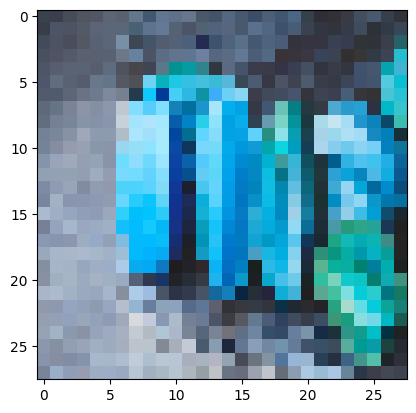

In [42]:
ch = 100
plt.imshow(train_images[ch]) , train_labels[ch] , Name(train_labels[ch])

**4.-Selección y Entrenamiento del Modelo**

In [112]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)))

In [113]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(30, activation = 'softmax'))

In [114]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,543,582 (21.15 MB)

 Trainable params: 5,543,582 (21.15 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 69s 103ms/step - accuracy: 0.1373 - loss: 3.0572 - val_accuracy: 0.3550 - val_loss: 2.3679
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.3763 - loss: 2.1190 - val_accuracy: 0.4597 - val_loss: 1.9789
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 67s 102ms/step - accuracy: 0.5688 - loss: 1.4502 - val_accuracy: 0.4993 - val_loss: 1.8963
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 85s 107ms/step - accuracy: 0.6856 - loss: 1.0123 - val_accuracy: 0.5793 - val_loss: 1.7304
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 76s 99ms/step - accuracy: 0.7768 - loss: 0.7014 - val_accuracy: 0.6027 - val_loss: 1.7358
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.8247 - loss: 0.5362 - val_accuracy: 0.5990 - val_loss: 1.9005
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 64s 98ms/step - accuracy: 0.8560 - loss: 0.4150 - val_accuracy: 0.6120 - val_loss: 1.8683
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 89s 108ms/step - accuracy: 0.8742 - loss: 0.35

Precisión

94/94 - 2s - 19ms/step - accuracy: 0.6100 - loss: 2.1494


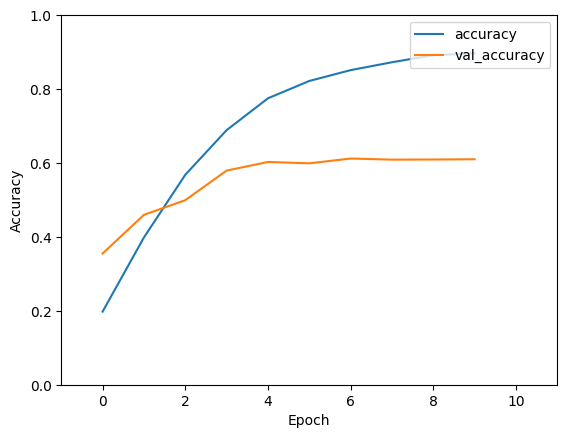

In [116]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([-1, 11])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

**5. Prueba del Modelo**

In [117]:
predictions = model.predict(test_images)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


In [118]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(30))
  plt.yticks([])
  thisplot = plt.bar(range(30), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Prueba 1

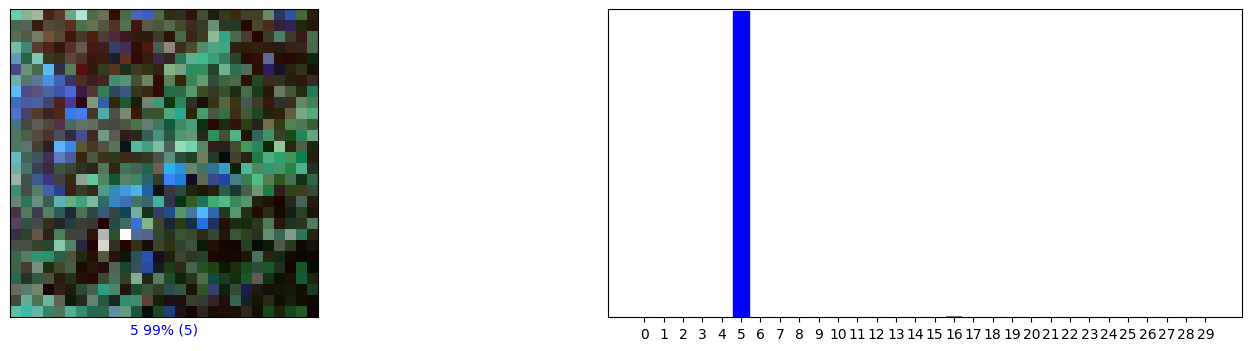

In [119]:
i = 520
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Prueba 2

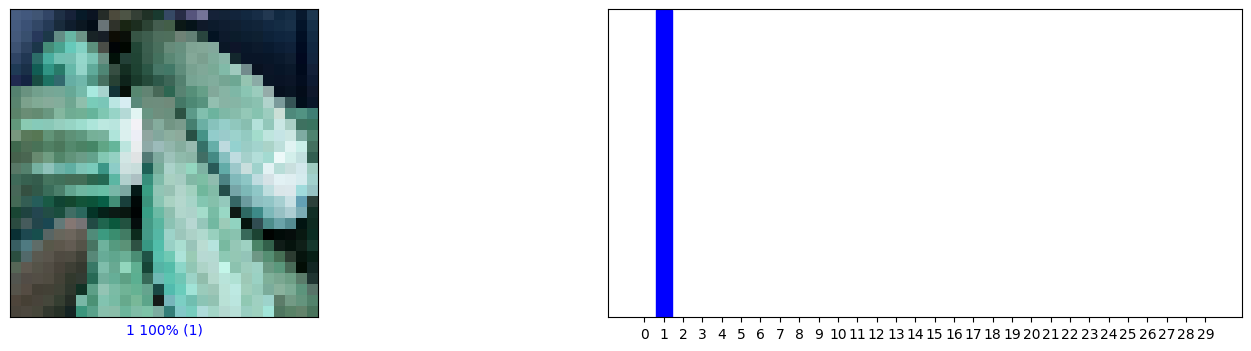

In [124]:
i = 105
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Prueba 3

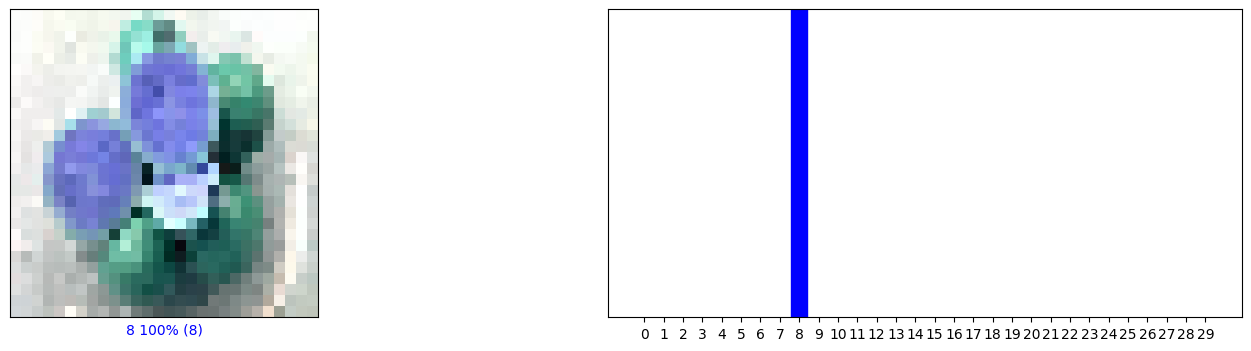

In [121]:
i = 879
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Prueba 4

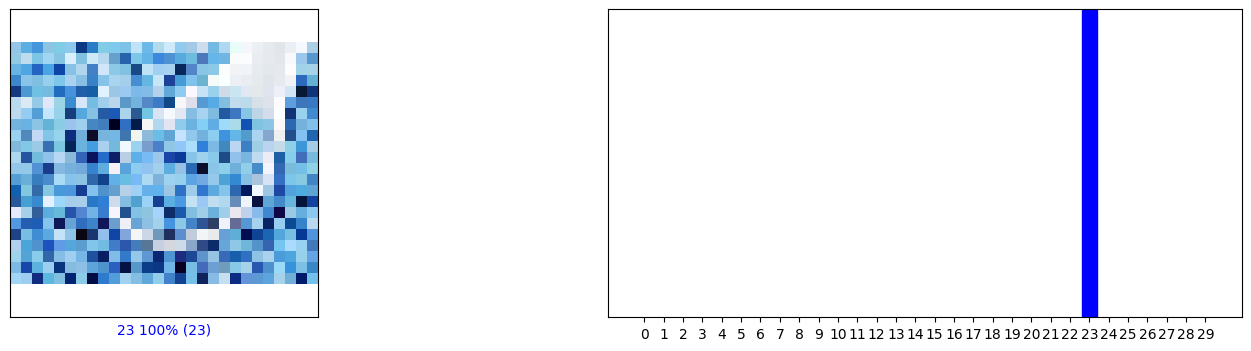

In [122]:
i = 2390
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Prueba 5

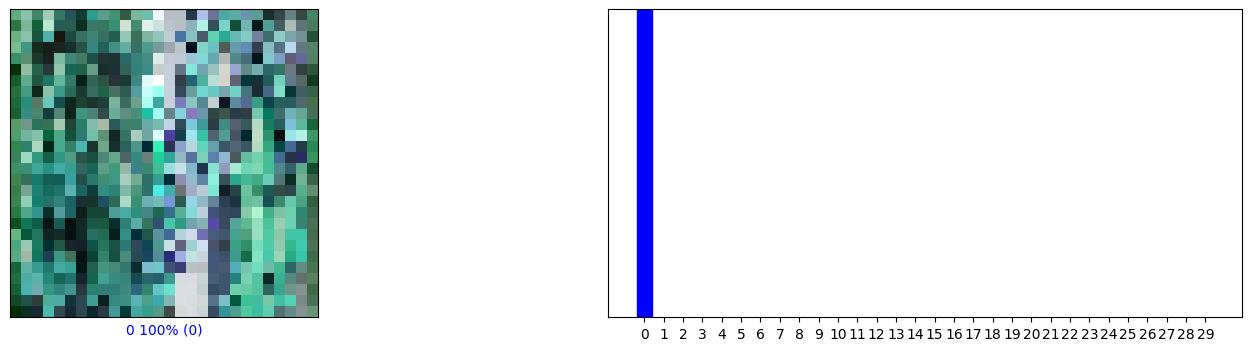

In [123]:
i = 74
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()